In [8]:
# Step 1: Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
%%time
# Sample data (replace with your actual dataset)
# data = pd.DataFrame({
#     'title': ['Market Rally', 'Investing in Crypto', 'Stock Market Analysis', 'Economic Outlook'],
#     'text': [
#         'The stock market rallied today with major indices closing at record highs.',
#         'Investing in cryptocurrencies can be risky but potentially rewarding.',
#         'An analysis of the current stock market trends and future predictions.',
#         'The economic outlook for the next quarter looks promising.'
#     ],
#     'date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04'])
# })
data_temp = pd.read_csv('combined_file.csv')
data=data_temp[0:2000]
# Step 2: Preprocess data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['processed_text'] = data['title'].apply(preprocess_text)




[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


CPU times: user 3.77 s, sys: 157 ms, total: 3.93 s
Wall time: 3.97 s


<timed exec>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
data['processed_text']

0                    stock wrapped worst week since march
1                  get ruined option part simple strategy
2       pg e officially plan banrkuptcy filing ceo exi...
3                million portfolio better owning business
4                    best thing happen stock market crash
                              ...                        
1995                             lol found grandpa office
1996    frontier spirit merge creating fifth largest a...
1997    corsair gaming crsr report record first quarte...
1998    monday market massacre p pace worst one day pl...
1999    newly unsealed fbi doc show justice department...
Name: processed_text, Length: 2000, dtype: object

In [11]:
%%time
# Step 3: Topic modeling using LDA
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['processed_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Displaying topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)



Topic 0:
year stock week tesla elon musk billion say new share
Topic 1:
stock market big tesla fund gamestop close drop robinhood short
Topic 2:
say money fed bank company billion amazon rate china trump
Topic 3:
stock market day million today trading earnings think month year
Topic 4:
market time like share tesla stock new gme billion high
CPU times: user 2.4 s, sys: 3.97 ms, total: 2.4 s
Wall time: 2.56 s


/tmp/ipykernel_1130/992972644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dominant_topic'] = lda.transform(X).argmax(axis=1)


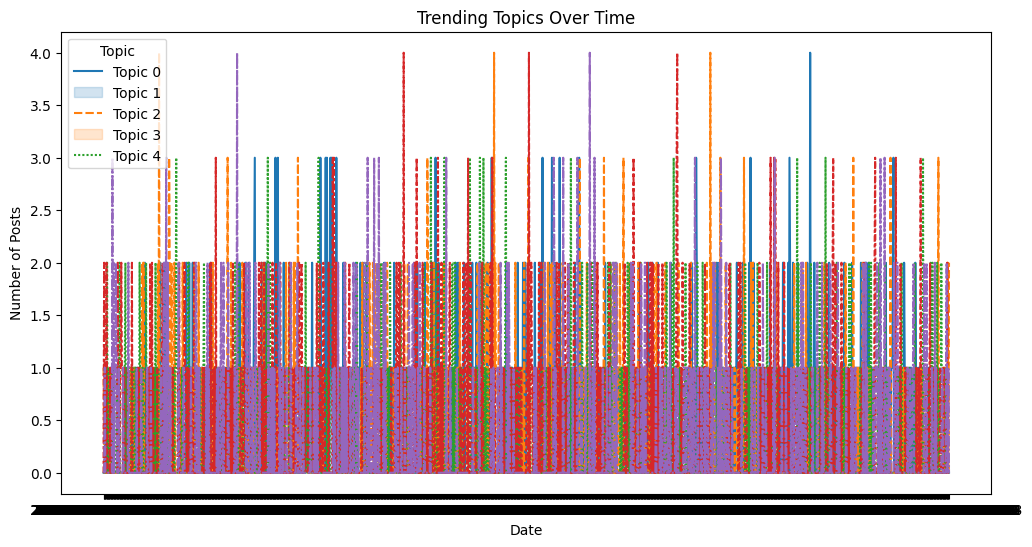

In [13]:
# Step 4: Trend detection
data['dominant_topic'] = lda.transform(X).argmax(axis=1)

# Count the number of posts per topic per day
topic_counts = data.groupby(['created', 'dominant_topic']).size().unstack(fill_value=0)

# Step 5: Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=topic_counts)
plt.title('Trending Topics Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(title='Topic', loc='upper left', labels=[f'Topic {i}' for i in range(5)])
plt.show()